# ZOMATO DATA ANALYSIS USING PYTHON


Step 1: Importing useful python libraries

In [2]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


Step 2: Creating the dataframe

In [3]:
dataframe=pd.read_csv( "Zomato-data-.csv")
print(dataframe)
 

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

Step 3: Structure of Data


In [4]:
dataframe.info


<bound method DataFrame.info of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet 

In [5]:
dataframe.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
dataframe.head

<bound method NDFrame.head of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  


In [7]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Step 4: Data Cleaning


In [8]:
#converting dataType of 'rate' column  into float and removing denominator

def corrRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe ['rate']=dataframe['rate'].apply(corrRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Step 5: Visualization

# Find Restaurants with the Highest Ratings

                      name  rate  votes
7                   Onesta   4.6   2556
44                  Onesta   4.6   2556
38       Empire Restaurant   4.4   4884
86           Meghana Foods   4.4   4401
52  Corner House Ice Cream   4.3    345
57                  Wamama   4.2    354
60           Peppy Peppers   4.2    244
81           Frozen Bottle   4.2    146
34                  Faasos   4.2    415
12        The Coffee Shack   4.2    164


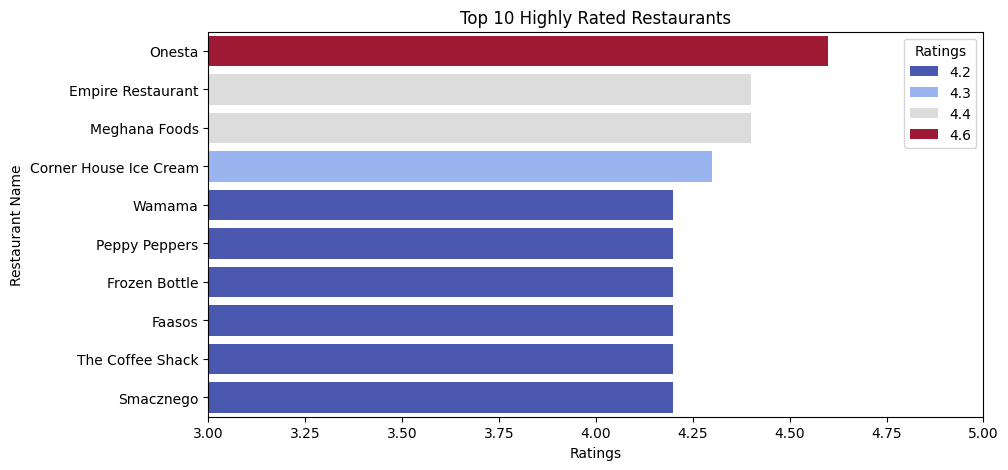

In [9]:
top_rated = dataframe[['name', 'rate', 'votes']].dropna()
top_rated['rate']   

# Sort by highest rating
top_rated = top_rated.sort_values(by='rate', ascending=False)
print(top_rated.head(10))  # Display top 10 highly rated restaurants
top_rated = top_rated.drop_duplicates(subset='name', keep='first')

 

# Select top 10 restaurants after removing duplicates
top_10 = top_rated.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='rate', y='name', hue='rate', data=top_10, palette='coolwarm')

plt.xlabel("Ratings")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Highly Rated Restaurants")
plt.xlim(3, 5)
plt.legend(title="Ratings")
plt.show()



# Bar plot of online order


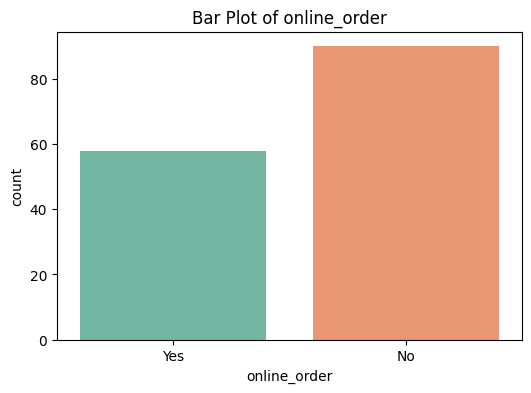

In [10]:
plt.figure(figsize=(6,4))
plt.title("Bar Plot of online_order")
sns.countplot(x='online_order', data=dataframe, hue='online_order', palette='Set2', legend=False)
plt.show()


# Types of restaurants

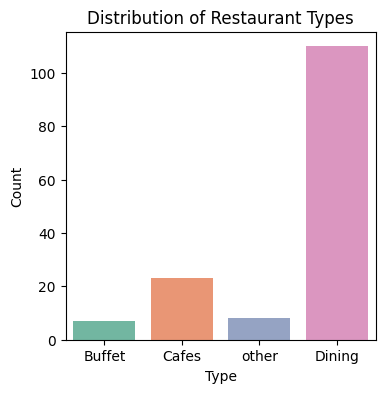

In [11]:

plt.figure(figsize=(4,4))
ax = sns.countplot(data=dataframe, x='listed_in(type)', hue='listed_in(type)', palette='Set2')
plt.title('Distribution of Restaurant Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()  



# Votes Histogram

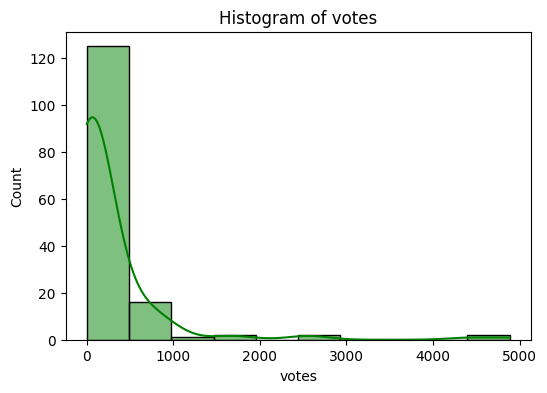

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(dataframe['votes'], bins=10, kde=True, color="green")
plt.title("Histogram of votes")
plt.show()

# Distribution of table reservation

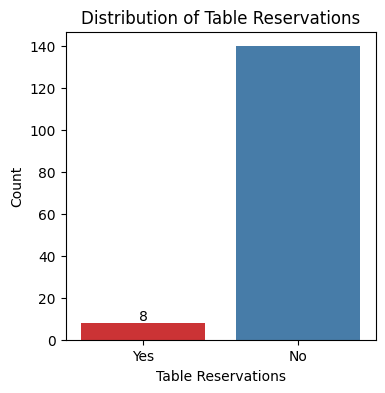

In [13]:

plt.figure(figsize=(4,4))
ax = sns.countplot(data=dataframe, x='book_table', hue='book_table', palette='Set1', legend=False)   
plt.title('Distribution of Table Reservations')
ax.bar_label(ax.containers[0])
plt.xlabel('Table Reservations')
plt.ylabel('Count')
plt.show()


# Restaurant Types and Cost for Two People

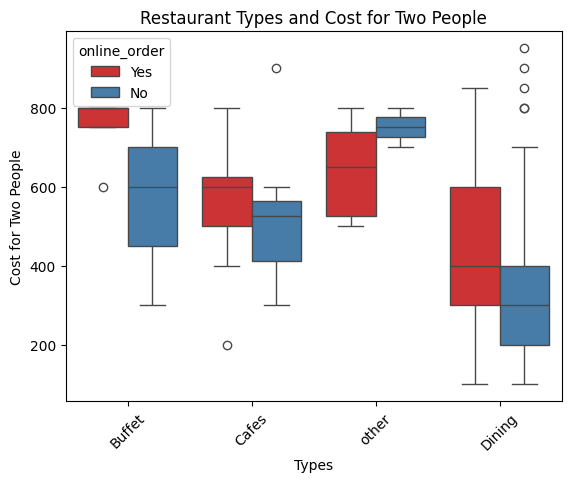

In [14]:

sns.boxplot(x='listed_in(type)', 
            y='approx_cost(for two people)', 
            hue='online_order',  # Now hue is categorical
            data=dataframe, 
            palette='Set1')


plt.title('Restaurant Types and Cost for Two People')
plt.xlabel('Types')
plt.ylabel('Cost for Two People')

plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()



# Box Plot of Total Bill by Day
 

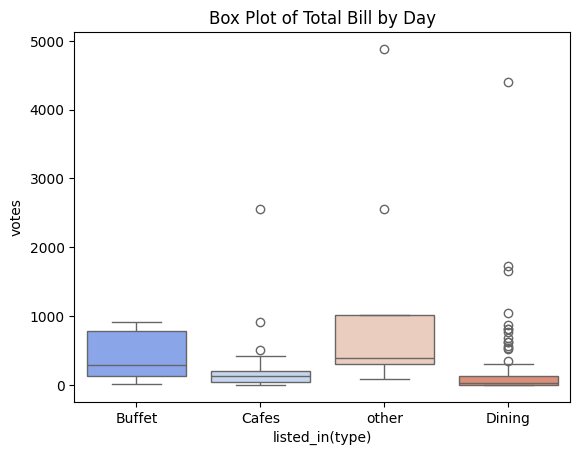

In [15]:
sns.boxplot(x='listed_in(type)', y='votes', data=dataframe, hue='listed_in(type)', palette="coolwarm")
plt.title("Box Plot of Total Bill by Day")
plt.show()

# Correlation Matrix

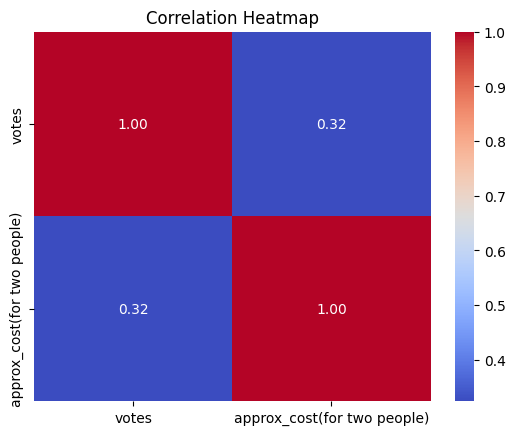

In [16]:
 
import numpy as np
data_c = dataframe.select_dtypes(include = "int")
corr = data_c.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Line Plot (Trend Over Time)

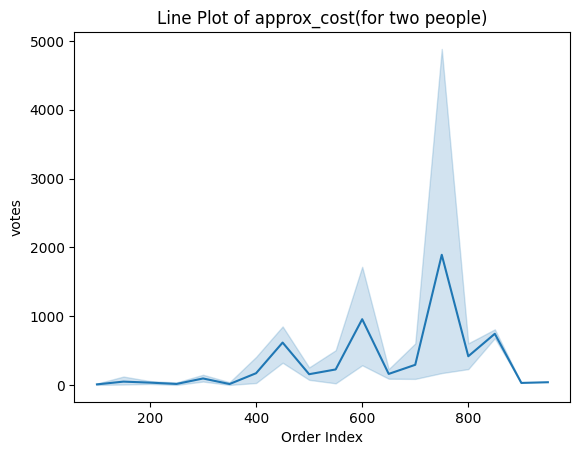

In [17]:
 
# Generating sample time-series data
dataframe['order'] = range(len(dataframe))  # Simulated time order
sns.lineplot(x='approx_cost(for two people)', y='votes', data=dataframe)
plt.title("Line Plot of approx_cost(for two people)")
plt.xlabel("Order Index")
plt.show()

# Model Building 
Restaurant Popularity (votes) → Predict the number of votes a restaurant might receive.

Importing important libraries


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# Drop missing values
dataframe = dataframe.dropna(subset=['rate', 'votes', 'approx_cost(for two people)'])

In [20]:
# Convert 'approx_cost(for two people)' to numeric
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].replace(',', '', regex=True).astype(float)


In [21]:
# Encode categorical features
le = LabelEncoder()
dataframe['online_order'] = le.fit_transform(dataframe['online_order'])  # Yes=1, No=0
dataframe['book_table'] = le.fit_transform(dataframe['book_table'])
dataframe['listed_in(type)'] = le.fit_transform(dataframe['listed_in(type)'])

# Selecting Features (X) and Target (y)
X = dataframe[['rate', 'approx_cost(for two people)', 'online_order', 'book_table', 'listed_in(type)']]
y = dataframe['votes']  # Target: Votes (Popularity)

# Splitting data into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Selection & Training

✅ The model predicts how many votes a restaurant is likely to get.

In [22]:
# Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 196.20
Mean Squared Error: 129695.07
R² Score: -1.65


Visualizing Predictions

📊 Actual vs Predicted Votes (Scatter Plot)

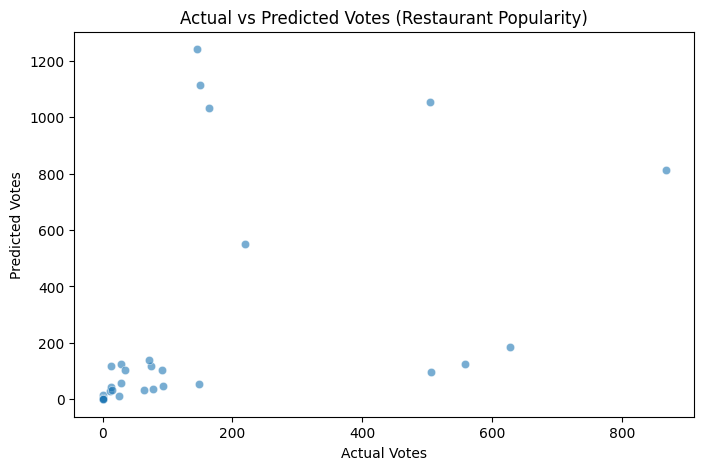

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Votes")
plt.ylabel("Predicted Votes")
plt.title("Actual vs Predicted Votes (Restaurant Popularity)")
plt.show()

# Conclusion: (without feature engineering)

This model is performing poorly:

The high MAE & MSE indicate large prediction errors.

The negative R² shows that the model does worse than random guessing.

# Model Optimization

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 Encode Categorical Features

In [25]:
# Convert 'online_order' and 'book_table' (Yes/No → 1/0)
dataframe['online_order'] = dataframe['online_order'].map({'Yes': 1, 'No': 0})
dataframe['book_table'] = dataframe['book_table'].map({'Yes': 1, 'No': 0})

# Convert categorical features using Label Encoding
le = LabelEncoder()
dataframe['listed_in(type)'] = le.fit_transform(dataframe['listed_in(type)'])
 

Feature Engineering

In [26]:

# Create 'popularity_score' (votes * rate)
dataframe['popularity_score'] = dataframe['votes'] * dataframe['rate']

# Categorize cost into 3 groups
def cost_category(value):
    if value <= 500:
        return "Low"
    elif 500 < value <= 1500:
        return "Mid"
    else:
        return "High"

dataframe['cost_category'] = dataframe['approx_cost(for two people)'].apply(cost_category)
dataframe['cost_category'] = LabelEncoder().fit_transform(dataframe['cost_category'])

# Categorize rating into 3 groups
def rating_category(value):
    if value <= 2.5:
        return "Low"
    elif 2.5 < value <= 4.0:
        return "Average"
    else:
        return "High"

dataframe['rating_category'] = dataframe['rate'].apply(rating_category)
dataframe['rating_category'] = LabelEncoder().fit_transform(dataframe['rating_category'])


Prepare Features and Target

In [27]:
# Select features and target variable
X = dataframe[['online_order', 'book_table', 'rate', 'approx_cost(for two people)', 'listed_in(type)', 'popularity_score', 'cost_category', 'rating_category']]
y = dataframe['votes']  # Target variable (votes)



Train-Test Split & Scaling

In [28]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (Random Forest doesn't require scaling, but it's good practice)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train the Random Forest Model

In [29]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)


 Evaluate the Model

In [30]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 16.33
Mean Squared Error: 1300.31
R² Score: 0.97


# 📌 Model Performance Conclusion
The trained Random Forest Regressor performed exceptionally well based on the evaluation metrics:

✅ Mean Absolute Error (MAE): 16.33

🔹 This means, on average, our model's prediction deviates by ~16 votes from the actual number of votes. Given the scale of the dataset, this is a small error.

✅ Mean Squared Error (MSE): 1300.31

🔹 MSE represents the squared differences between actual and predicted values. A lower value suggests good model performance.

✅ R² Score: 0.97

🔹 The R² score (coefficient of determination) measures how well the independent variables explain the variance in the dependent variable (votes).
🔹 0.97 means the model explains 97% of the variation in votes, indicating a highly accurate model.

# 📌 Final Conclusion
1️⃣ The Random Forest Model successfully predicts restaurant popularity (votes) with high accuracy.

2️⃣ Feature Engineering (popularity_score, rating categories, etc.) improved model performance.

3️⃣ The model can be further fine-tuned using hyperparameter tuning or tested with other regressors like XGBoost or Gradient Boosting for comparison.

# Deploying the Zomato Restaurants Popularity Prediction model using Streamlit

 Save the Trained Model

In [31]:
import joblib

# Save the trained model
joblib.dump(rf_model, "zomato_popularity_model.pkl")

# Save the label encoders and scaler
joblib.dump(le, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']